In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
arimadf = pd.read_csv("file1.csv")
lstmdf = pd.read_csv("lstm.csv")
randomdf = pd.read_csv("randomf.csv")


In [3]:
arimadf

,Unnamed: 0,predicted prices,Date
0,0,3151.185041,9/30/2020
1,1,3148.476069,10/1/2020
2,2,3218.795817,10/2/2020
3,3,3136.182826,10/5/2020
4,4,3191.498794,10/6/2020
...,...,...,...
374,374,3271.829233,3/25/2022
375,375,3298.125150,3/28/2022
376,376,3378.859786,3/29/2022
377,377,3390.762784,3/30/2022


In [4]:
lstmdf

,Unnamed: 0,lstm predicted prices
0,0,3138.0989
1,1,3124.6597
2,2,3106.0535
3,3,3084.2676
4,4,3062.7056
...,...,...
374,374,2790.1067
375,375,2824.2888
376,376,2867.1326
377,377,2755.6300


In [5]:
randomdf

,Unnamed: 0,rf predicted prices
0,0,642.224951
1,1,618.099609
2,2,3175.155573
3,3,3220.779237
4,4,1591.924034
...,...,...
374,374,1786.082078
375,375,2469.000964
376,376,796.779851
377,377,1581.178293


In [7]:
stock_ticker = input()
start = pd.to_datetime(['2008-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
AMZN = pd.read_csv(url)

AMZN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:

newdf = AMZN.iloc[3209:]
newdf.reset_index(inplace = True)
newdf

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,3209,2020-09-30,3141.139893,3212.879883,3133.989990,3148.729980,3148.729980,4896100
1,3210,2020-10-01,3208.000000,3224.000000,3172.000000,3221.260010,3221.260010,4971900
2,3211,2020-10-02,3153.629883,3195.800049,3123.000000,3125.000000,3125.000000,5613100
3,3212,2020-10-05,3145.840088,3202.530029,3140.850098,3199.199951,3199.199951,3775300
4,3213,2020-10-06,3165.000000,3182.000000,3090.000000,3099.959961,3099.959961,5086900
...,...,...,...,...,...,...,...,...
374,3583,2022-03-25,3280.000000,3307.370117,3245.000000,3295.469971,3295.469971,2451600
375,3584,2022-03-28,3299.500000,3380.750000,3298.000000,3379.810059,3379.810059,2992700
376,3585,2022-03-29,3407.679932,3416.629883,3357.370117,3386.300049,3386.300049,3307700
377,3586,2022-03-30,3370.189941,3379.010010,3310.000000,3326.020020,3326.020020,2808400


In [23]:
data = [arimadf["Date"],arimadf["predicted prices"],lstmdf["lstm predicted prices"],randomdf["rf predicted prices"],newdf["Adj Close"]]

headers = ["Date","Arima predicted prices","lstm predicted prices","random forest predicted prices","Actual price"]

dfrm = pd.concat(data, axis=1, keys=headers)
dfrm

,Date,Arima predicted prices,lstm predicted prices,random forest predicted prices,Actual price
0,9/30/2020,3151.185041,3138.0989,642.224951,3148.729980
1,10/1/2020,3148.476069,3124.6597,618.099609,3221.260010
2,10/2/2020,3218.795817,3106.0535,3175.155573,3125.000000
3,10/5/2020,3136.182826,3084.2676,3220.779237,3199.199951
4,10/6/2020,3191.498794,3062.7056,1591.924034,3099.959961
...,...,...,...,...,...
374,3/25/2022,3271.829233,2790.1067,1786.082078,3295.469971
375,3/28/2022,3298.125150,2824.2888,2469.000964,3379.810059
376,3/29/2022,3378.859786,2867.1326,796.779851,3386.300049
377,3/30/2022,3390.762784,2755.6300,1581.178293,3326.020020


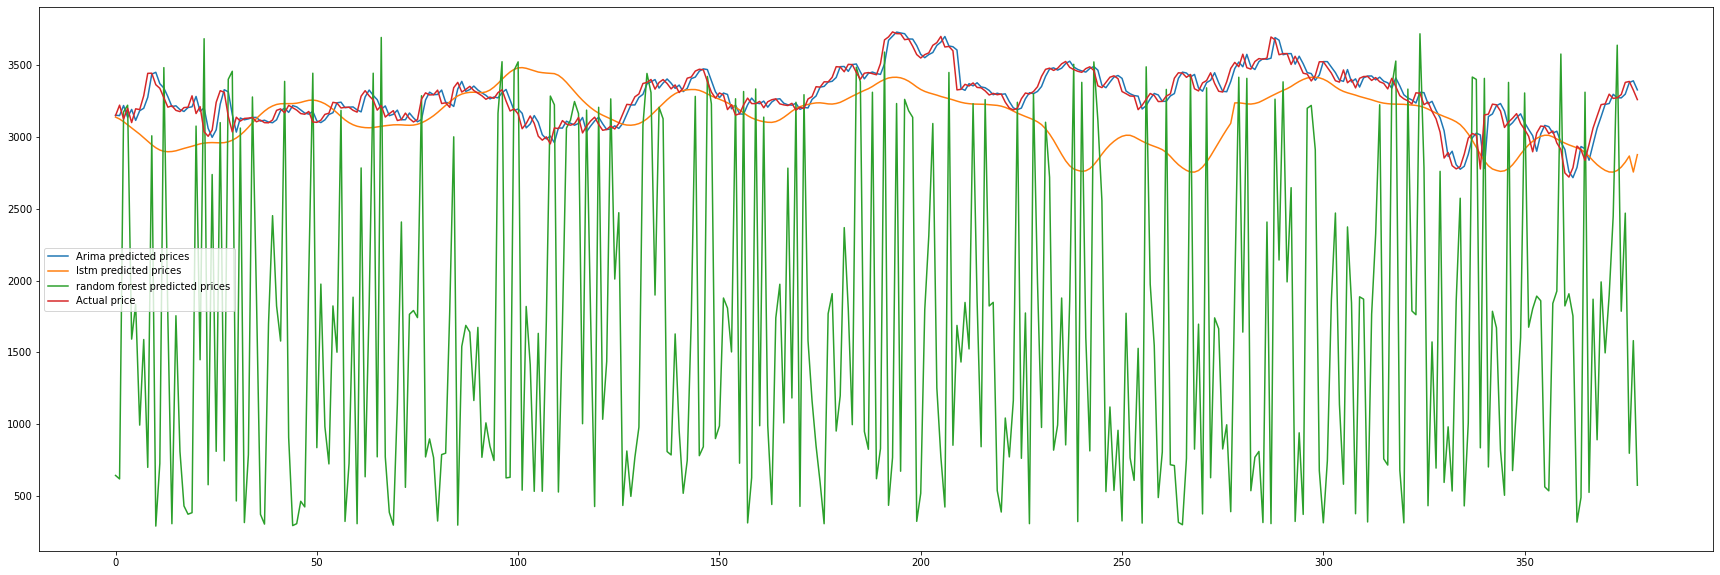

In [32]:
dfrm[['Arima predicted prices','lstm predicted prices','random forest predicted prices','Actual price']].plot(subplots=False,figsize=(30,10))